In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/Users/sayansarkar/Downloads/Diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
df.dtypes



 Number of times pregnant          int64
 Plasma glucose concentration      int64
 Diastolic blood pressure          int64
 Triceps skin fold thickness       int64
 2-Hour serum insulin              int64
 Body mass index                 float64
 Diabetes pedigree function      float64
 Age (years)                       int64
Outcome                           object
dtype: object

In [6]:
df.describe


<bound method NDFrame.describe of       Number of times pregnant   Plasma glucose concentration  \
0                            6                            148   
1                            1                             85   
2                            8                            183   
3                            1                             89   
4                            0                            137   
..                         ...                            ...   
763                         10                            101   
764                          2                            122   
765                          5                            121   
766                          1                            126   
767                          1                             93   

      Diastolic blood pressure   Triceps skin fold thickness  \
0                           72                            35   
1                           66                           

In [7]:
# checking for missing values

print(df.isnull().sum())





 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
Outcome                          0
dtype: int64


In [8]:
#Encoding Categorical Variables:

# Convert 'YES' to 1 and 'NO' to 0
df['Outcome'] = df['Outcome'].map({'YES': 1, 'NO': 0})




In [9]:
print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
#Outlier Detection and Treatment
#Visual Detection with Box Plots


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
print(df.columns.tolist())


[' Number of times pregnant', ' Plasma glucose concentration', ' Diastolic blood pressure', ' Triceps skin fold thickness', ' 2-Hour serum insulin', ' Body mass index', ' Diabetes pedigree function', ' Age (years)', 'Outcome']


In [14]:
#Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()


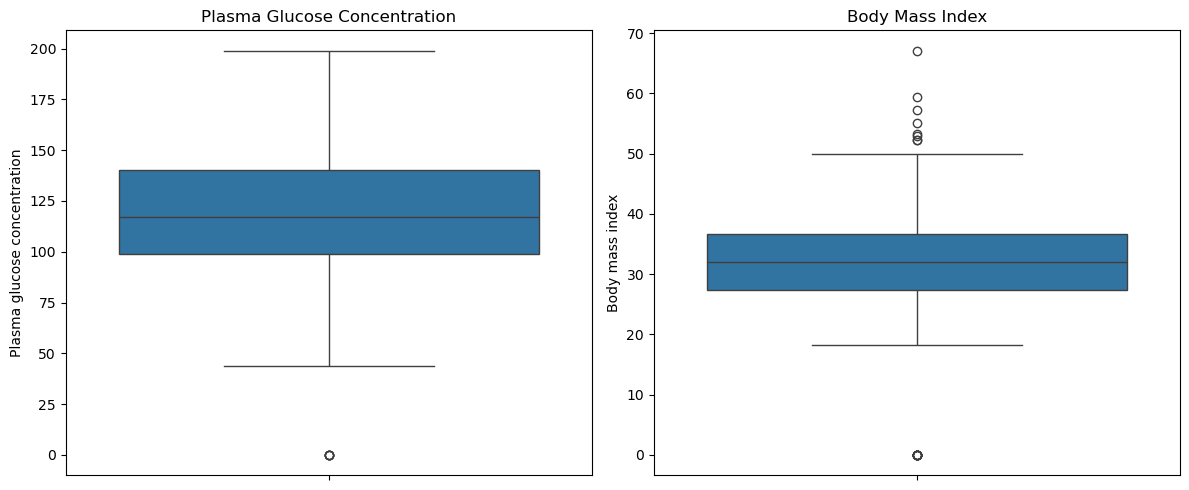

In [16]:
#Visual Detection with Box Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Plasma glucose concentration'])
plt.title('Plasma Glucose Concentration')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Body mass index'])
plt.title('Body Mass Index')

plt.tight_layout()
plt.show()

In [17]:

# outlier detection and  Handling 
# Statistical Detection using Z-Score
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df[['Plasma glucose concentration', 'Body mass index']]))

# Identify rows where any Z-score is > 3
outliers = (z_scores > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 19


In [18]:
#Remove Outliers
# Assuming 'outliers' is a boolean Series where True indicates an outlier row
df_cleaned = df[~outliers].reset_index(drop=True)

print("New shape after removing outliers:", df_cleaned.shape)

New shape after removing outliers: (749, 9)


In [19]:
# 4. Exploratory Data Analysis (EDA)

# 4.1 Summary statistics
#Calculate basic statistics (mean, median, standard deviation, etc.) for all numerical features to understand the distribution of the data.


# Basic descriptive statistics
print(df_cleaned.describe())

       Number of times pregnant  Plasma glucose concentration  \
count                749.000000                    749.000000   
mean                   3.862483                    121.853138   
std                    3.375921                     30.587689   
min                    0.000000                     44.000000   
25%                    1.000000                     99.000000   
50%                    3.000000                    117.000000   
75%                    6.000000                    141.000000   
max                   17.000000                    199.000000   

       Diastolic blood pressure  Triceps skin fold thickness  \
count                749.000000                   749.000000   
mean                  69.599466                    20.606142   
std                   18.263367                    15.851450   
min                    0.000000                     0.000000   
25%                   64.000000                     0.000000   
50%                   72.00000

In [20]:
# Median of each column
print("\nMedian values:")
print(df_cleaned.median())


Median values:
Number of times pregnant          3.000
Plasma glucose concentration    117.000
Diastolic blood pressure         72.000
Triceps skin fold thickness      23.000
2-Hour serum insulin             38.000
Body mass index                  32.300
Diabetes pedigree function        0.376
Age (years)                      29.000
Outcome                           0.000
dtype: float64


In [24]:
df_cleaned.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,3.862483,121.853138,69.599466,20.606142,81.161549,32.339252,0.470113,33.348465,0.349800
std,3.375921,30.587689,18.263367,15.851450,115.972403,6.692432,0.322613,11.718515,0.477225
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,38.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,55.000000,2.329000,81.000000,1.000000


In [23]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      749 non-null    int64  
 1   Plasma glucose concentration  749 non-null    int64  
 2   Diastolic blood pressure      749 non-null    int64  
 3   Triceps skin fold thickness   749 non-null    int64  
 4   2-Hour serum insulin          749 non-null    int64  
 5   Body mass index               749 non-null    float64
 6   Diabetes pedigree function    749 non-null    float64
 7   Age (years)                   749 non-null    int64  
 8   Outcome                       749 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.8 KB


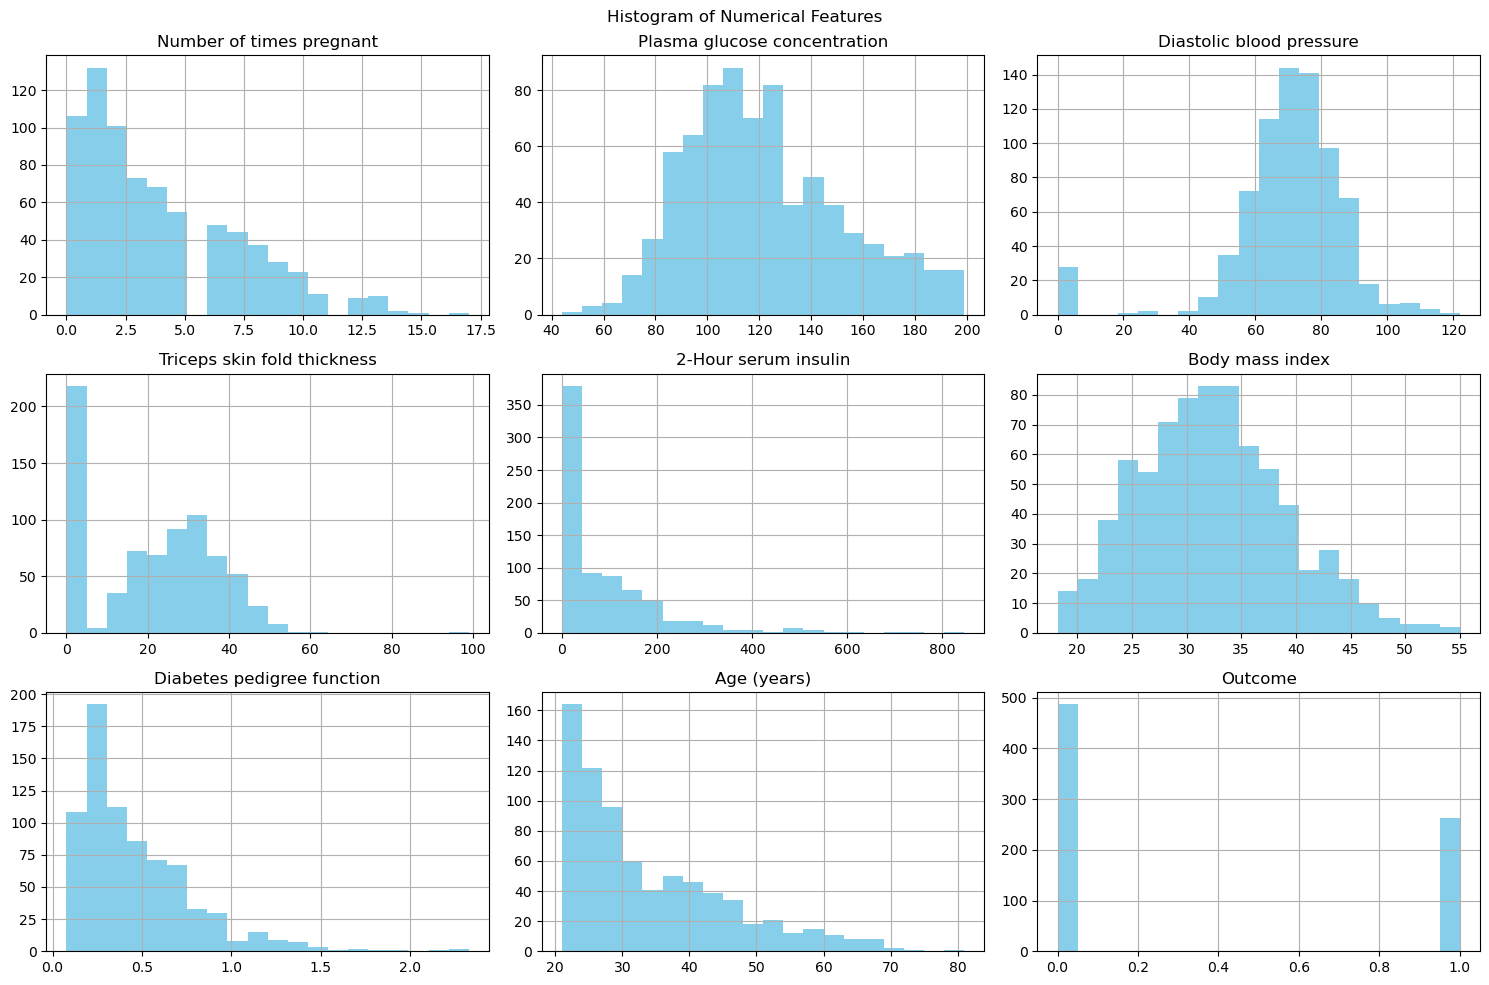

In [25]:
#4.2 Univariate Analysis
#Numerical Features (Histograms + Box Plots)
#Numerical Features: Visualize distributions using histograms and box plots to identify the spread of the data.
#Categorical Features: Display the distribution of the outcome variable (diabetes) using bar charts.

# Plot histograms
df_cleaned.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

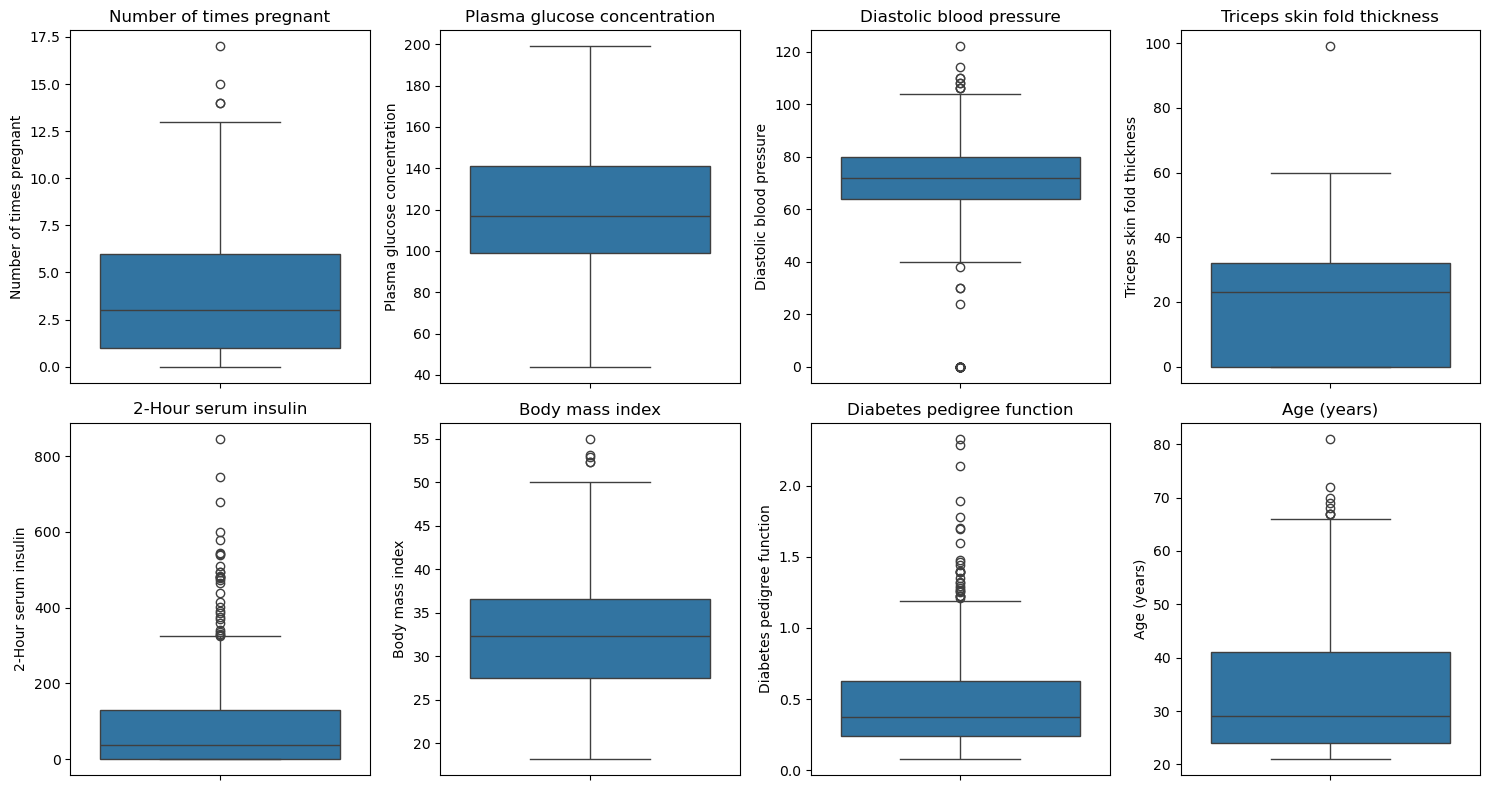

In [26]:
#Numerical Features (Histograms + Box Plots)
# Plot box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(df_cleaned.columns[:-1]):  # Exclude 'Outcome'
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/2207692295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Outcome_str', palette={'0': 'red', '1': 'green'})


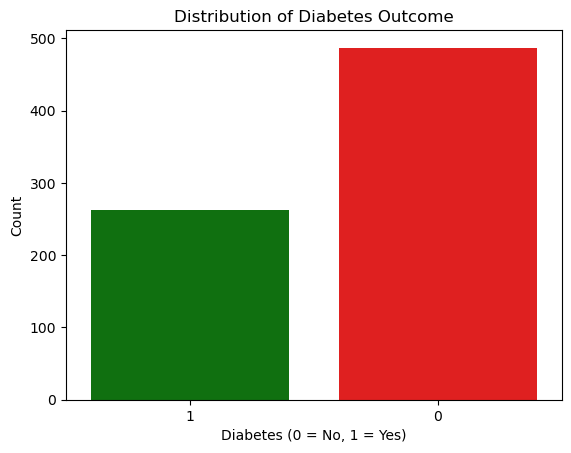

In [29]:
#Categorical Feature (Outcome) – Bar Chart
#Categorical Features: Display the distribution of the outcome variable (diabetes) using bar charts.


# Convert Outcome to string for plotting
df_cleaned['Outcome_str'] = df_cleaned['Outcome'].astype(str)

sns.countplot(data=df_cleaned, x='Outcome_str', palette={'0': 'red', '1': 'green'})
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()




In [31]:
print(df_cleaned.columns.tolist())


['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age (years)', 'Outcome', 'Outcome_str']


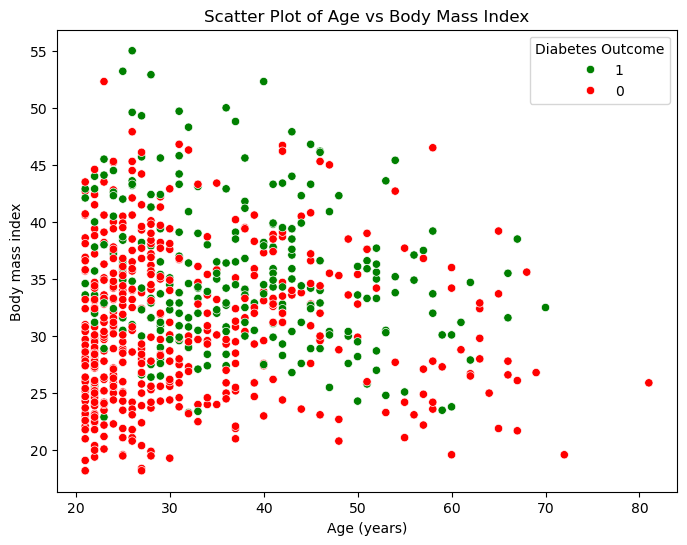

In [34]:
#4.3 Bivariate Analysis
#Relationships Between Features: Use scatter plots to visualize relationships between numerical features (e.g., age vs. BMI).
#red means no diabetes
#green means diabetes

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Age (years)', y='Body mass index', hue='Outcome_str', palette={'0': 'red', '1': 'green'})
plt.title('Scatter Plot of Age vs Body Mass Index')
plt.xlabel('Age (years)')
plt.ylabel('Body mass index')
plt.legend(title='Diabetes Outcome')
plt.show()


/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


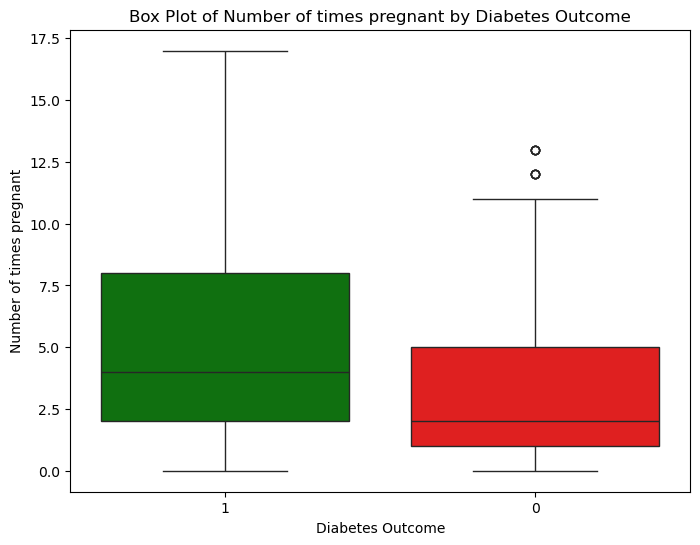

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


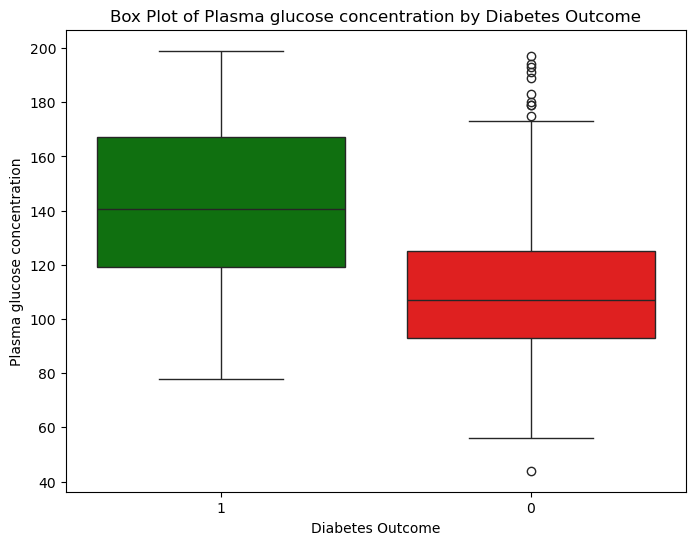

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


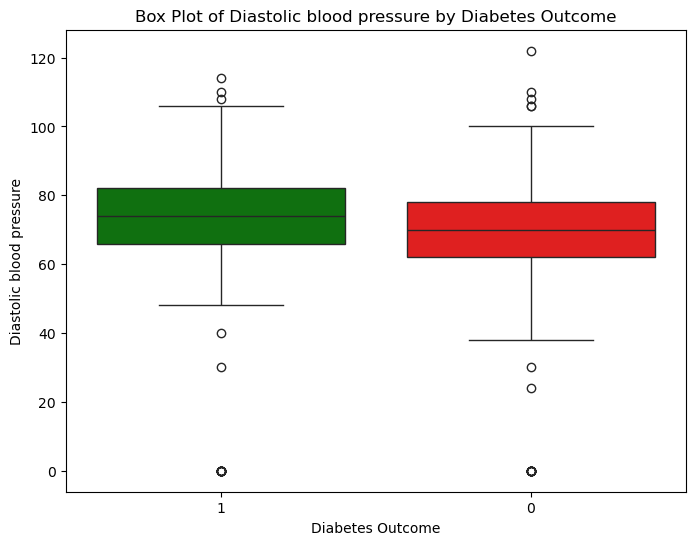

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


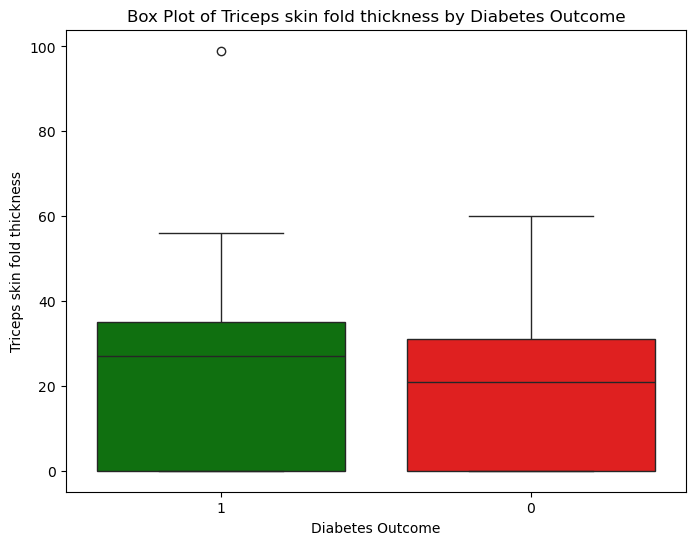

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


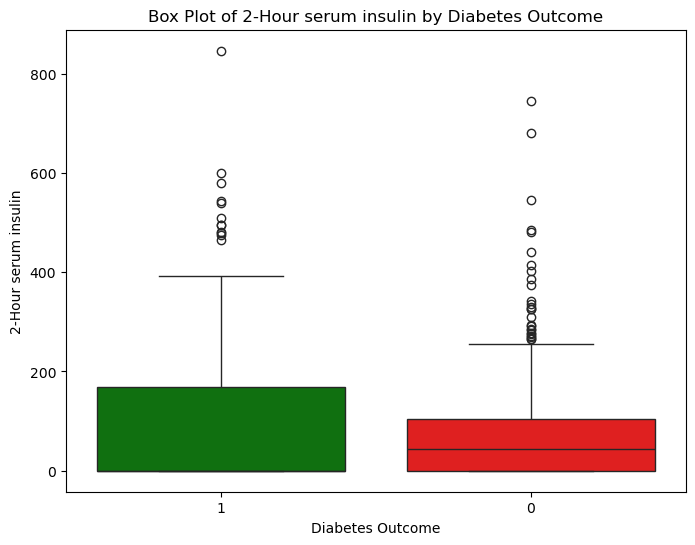

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


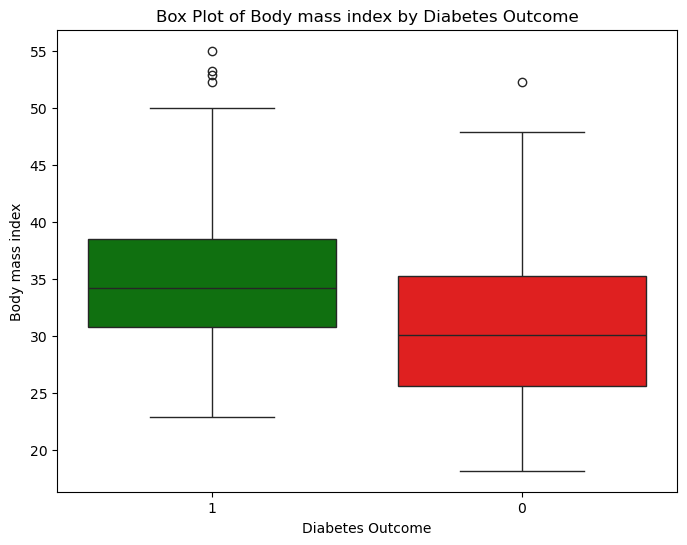

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


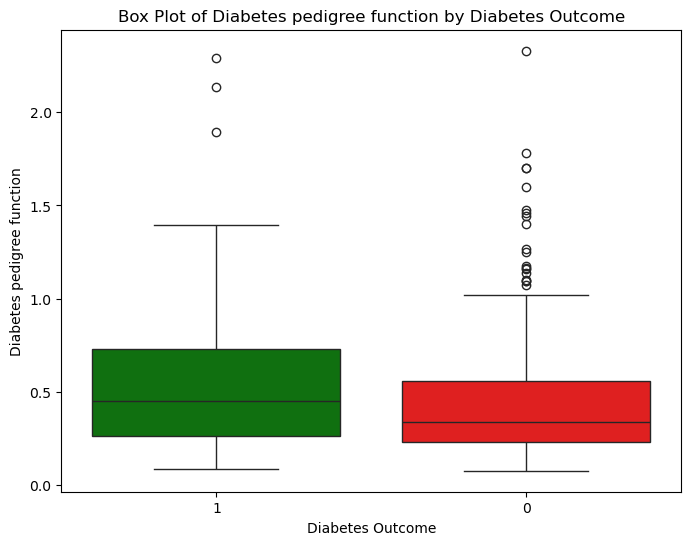

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_2075/1140096732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})


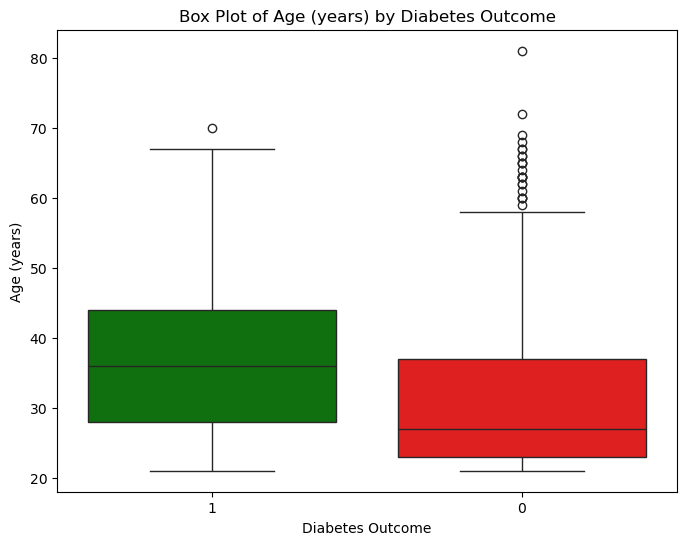

In [35]:
#Outcome vs. Features: Use box plots to examine how numerical features vary between individuals with and without diabetes.
numerical_features = [
    'Number of times pregnant',
    'Plasma glucose concentration',
    'Diastolic blood pressure',
    'Triceps skin fold thickness',
    '2-Hour serum insulin',
    'Body mass index',
    'Diabetes pedigree function',
    'Age (years)'
]

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cleaned, x='Outcome_str', y=feature, palette={'0': 'red', '1': 'green'})
    plt.title(f'Box Plot of {feature} by Diabetes Outcome')
    plt.xlabel('Diabetes Outcome')
    plt.ylabel(feature)
    plt.show()

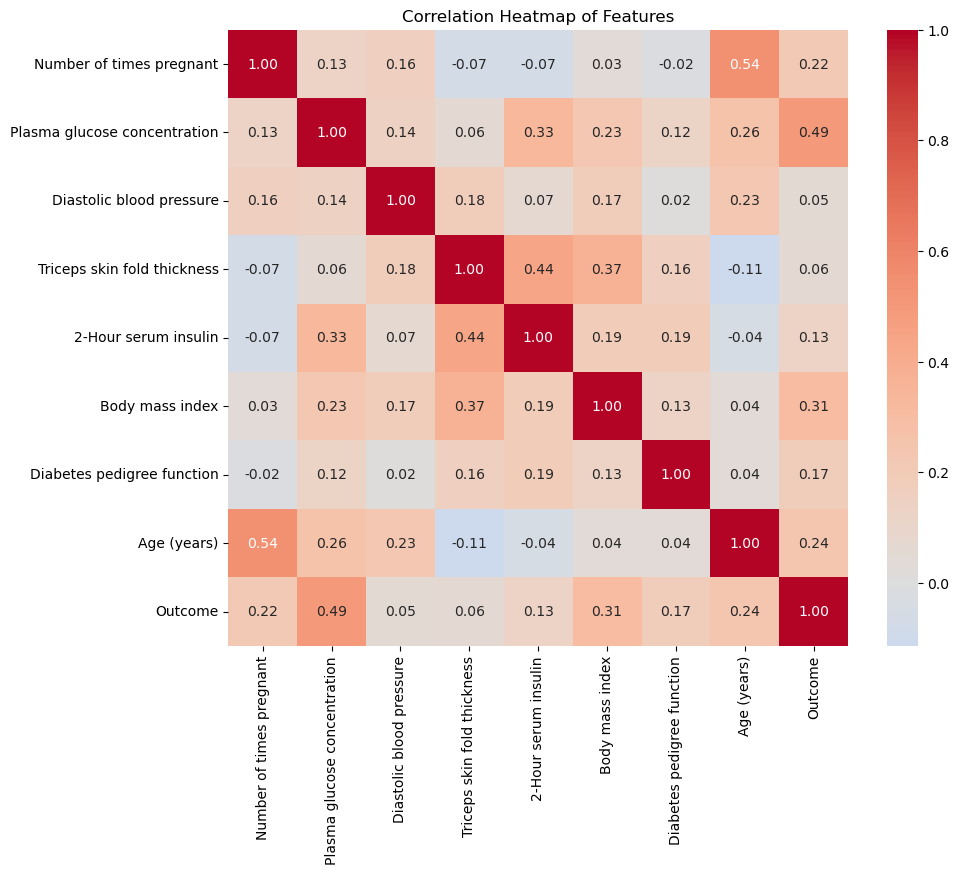

In [36]:
#Correlation Analysis: Create a heatmap of the correlation matrix to identify any significant relationships between features.
plt.figure(figsize=(10, 8))
corr = df_cleaned[numerical_features + ['Outcome']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

In [37]:
# Model BUilding
#5.1 Model Training
#Data Splitting: Split the dataset into training and testing sets (commonly 70% for training and 30% for testing).

#1. Data Splitting
#We'll split  cleaned dataset (df_cleaned) into features (X) and target (y).

#Then split into training (70%) and testing (30%).



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Features and target
X = df_cleaned.drop(columns=['Outcome', 'Outcome_str'])  # all features except target columns
y = df_cleaned['Outcome']  # target variable


In [40]:
# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [41]:
# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict on test data
y_pred = dtree.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7333


In [42]:
# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       146
           1       0.63      0.59      0.61        79

    accuracy                           0.73       225
   macro avg       0.71      0.70      0.70       225
weighted avg       0.73      0.73      0.73       225

